# Example Notebook for TAFT
## Time alignment for tiles 

In [1]:
%cd ..

/home/maximilian/Github/melp


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from melp import Detector
import melp.taft

Welcome to JupyROOT 6.24/06


## Creating/Loading detector with misalignment

In [4]:
mu3e_detector = Detector.initFromROOT("./run42_20000.root")
#mu3e_detector = Detector.initFromSave("./save_file_3mio_iter2.taft")

------------------------------
Detector information

Stats:
  - Tiles:  5824
    -> misal:  True
  - Pixel Modules:  2844
  - Loaded Runs (Tiles):  []
  - Loaded Runs (Pixel):  []
------------------------------


In [5]:
melp.taft.select(mu3e_detector)

In [12]:
options={"ttree_loc": "alignment/mu3e"}

hist, hist_2, hist_3 = melp.taft.find_cosmic_events("../../Downloads/mu3e_sorted_000002_cosmic.root",**options)

100 % | Total Frames:  4999840
Frames with hits:  3820323


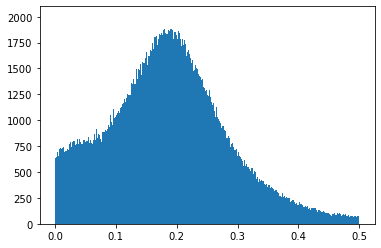

In [13]:
plt.hist(hist, bins=1000, range=(0,0.5))
plt.ylim(ymax = 2100, ymin = 0)
plt.show()

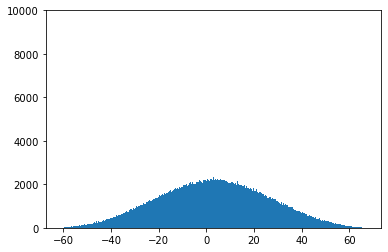

In [14]:
plt.hist(hist_2, bins=2000)#, range=(-10,10))
plt.ylim(ymax = 10000, ymin = 0)
plt.show()

In [15]:
print(np.median(hist_2))
print(1/np.sqrt(len(hist_2)))

3.0118623971939087
0.0006952642169473248


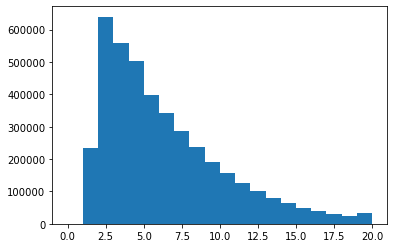

In [16]:
plt.hist(hist_3, bins=20, range=(0,20))
#plt.ylim(ymax = 2100, ymin = 0)
plt.show()

In [6]:
import ROOT

In [7]:
root_file = ROOT.TFile.Open("../../Downloads/mu3e_sorted_000002_cosmic.root", "READ")
ttree_mu3e = root_file.Get("alignment/mu3e")

In [8]:
options_1 = {
    "ttree_mu3e": ttree_mu3e
}

In [9]:
i = melp.taft.find_next_cosmic_event(ttree_mu3e, 2000, 1)

In [10]:
print(i)

2000


In [11]:
test = melp.taft.check_cosmic_events(ttree_mu3e,i,1)

[302780, 302725, 200907, 200832, 200833, 201026, 201939, 201883, 202645]
[ 0.          0.09666484  5.68207261  5.86261079  6.11411086 17.75476082
 18.23213804 18.28549925 55.54870063]


In [15]:
pos1 = mu3e_detector.TileDetector.tile[200907].pos

In [16]:
pos2 = mu3e_detector.TileDetector.tile[200833].pos

In [17]:
print(np.sqrt((pos1[0]-pos2[0])**2+ (pos1[1]-pos2[1])**2 +(pos1[2]-pos2[2])**2))

102.7937697265552


In [18]:
print(pos1, pos2)

[29.456160477627883, 53.03238008451545, -463.75500000000005] [34.76117204208972, -48.801774534143725, -476.725]


In [19]:
print(5.68207261-6.11411086)

-0.4320382500000006


In [22]:
list1 = [0,1,2,3,4,5,6]

In [23]:
print(list1[0:1])

[0]


In [12]:
print(test)

{2: [[302780, 302725], [133061.49290033005, 133061.58956517122]], 5: [[200907, 200832, 200833], [133067.17497294184, 133067.35551111793, 133067.60701118704]], 8: [[201026, 201939, 201883], [133079.2476611527, 133079.72503836863, 133079.77839958362]]}
